In [60]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, RocCurveDisplay
import pickle
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
df = pd.read_csv("/content/drive/MyDrive/IR/cleaned_data.csv",encoding="latin1")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [65]:
df = df.dropna(how='any',axis=0) 

In [66]:
df["verified_purchase"].value_counts()

False    900
True     812
Name: verified_purchase, dtype: int64

In [67]:
X = df['review_text'] #input var
y = df['verified_purchase'] #target var

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review_text'], df['verified_purchase'],test_size=0.4, random_state=123)

entiredf = format(df.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


In [69]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('Vocabulary:', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)

Vocabulary: {'start': 1649, 'cerav': 274, 'facial': 620, 'lotion': 1015, 'month': 1111, 'ago': 35, 'sinc': 1551, 'constant': 369, 'breakout': 208, 'norm': 1165, 'want': 1902, 'love': 1016, 'persist': 1256, 'recent': 1385, 'decid': 437, 'pick': 1268, 'simpl': 1548, 'best': 155, 'thing': 1770, 'day': 429, 'current': 417, 'spot': 1634, 'begun': 145, 'clear': 319, 'overal': 1210, 'look': 1009, 'face': 619, 'calmer': 246, 'goe': 757, 'fanci': 635, 'long': 1006, 'sciencey': 1489, 'alway': 56, 'come': 339, 'gentl': 734, 'like': 986, 'great': 780, 'price': 1322, 'buy': 240, 'item': 926, 'state': 1651, 'deliv': 459, 'time': 1787, 'good': 762, 'expect': 600, 'condition': 362, 'howev': 861, 'bottl': 198, 'lid': 978, 'terribl': 1758, 'difficult': 487, 'pour': 1310, 'tini': 1790, 'measur': 1066, 'slipperi': 1567, 'hold': 844, 'caus': 268, 'aggrav': 34, 'brilliant': 216, 'valu': 1872, 'money': 1110, 'vaselin': 1877, 'necess': 1144, 'household': 860, 'medicin': 1069, 'cabinet': 243, 'lip': 994, 'elbo

### Multinomial Naive Bayes model

In [70]:
#IMPLEMENTING AND RUNNNING MNB MODEL - COUNT
mnb1 = MultinomialNB()
mnb1.fit(train_c, y_train)
prediction = mnb1.predict(test_c)

In [71]:
#EVALUATION
mnb_a1 = accuracy_score(y_test, prediction)*100
mnb_p1 = precision_score(y_test, prediction)* 100
mnb_r1 = recall_score(y_test, prediction)*100
mnb_f11 = f1_score(y_test, prediction)*100

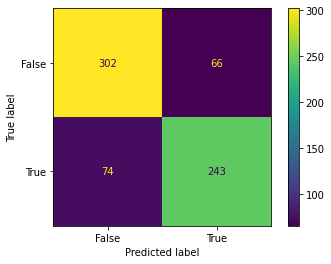

In [72]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb1.classes_) 
display.plot() 

The area under curve 0.7936068440543136


Text(0.5, 1.0, 'ROC Curve')

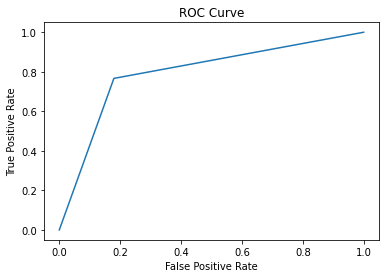

In [73]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

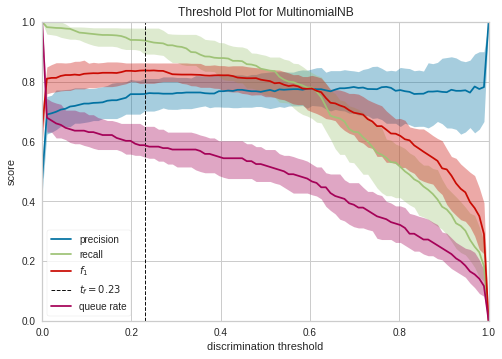

<AxesSubplot:title={'center':'Threshold Plot for MultinomialNB'}, xlabel='discrimination threshold', ylabel='score'>

In [118]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(mnb1)

visualizer.fit(train_c, y_train)        
visualizer.show()         

### Support Vector Machine model

In [74]:
#IMPLEMENTING AND RUNNNING SVM MODEL - COUNT
svm1 = SVC(kernel='linear')
svm1.fit(train_c, y_train)
prediction = svm1.predict(test_c)

In [75]:
#EVALUATION
svm_a1 = accuracy_score(y_test, prediction)*100
svm_p1 = precision_score(y_test, prediction)* 100
svm_r1 = recall_score(y_test, prediction)*100
svm_f11 = f1_score(y_test, prediction)*100

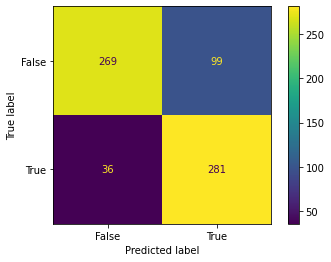

In [76]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm1.classes_) 
display.plot() 

The area under curve 0.8087067960499246


Text(0.5, 1.0, 'ROC Curve')

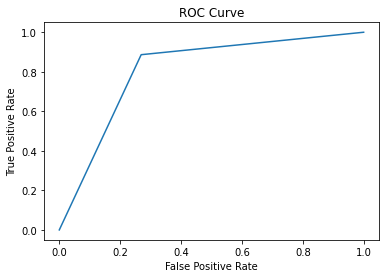

In [77]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

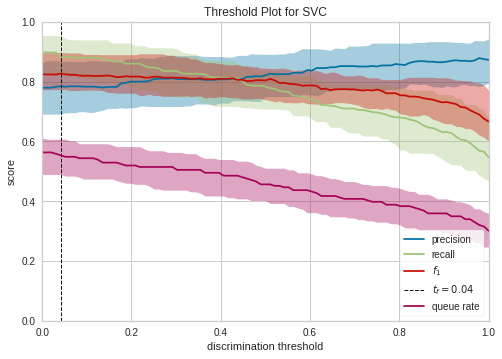

<AxesSubplot:title={'center':'Threshold Plot for SVC'}, xlabel='discrimination threshold', ylabel='score'>

In [119]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(svm1)

visualizer.fit(train_c, y_train)        
visualizer.show()           

### Logistic Regression model

In [78]:
#IMPLEMENTING AND RUNNNING LR MODEL - COUNT
lr1 = LogisticRegression()
lr1.fit(train_c, y_train)
prediction = lr1.predict(test_c)

In [79]:
#EVALUATION
lr_a1 = accuracy_score(y_test, prediction)*100
lr_p1 = precision_score(y_test, prediction)* 100
lr_r1 = recall_score(y_test, prediction)*100
lr_f11 = f1_score(y_test, prediction)*100

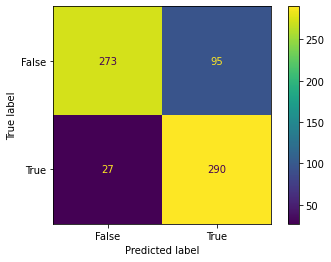

In [80]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.8283371622548348


Text(0.5, 1.0, 'ROC Curve')

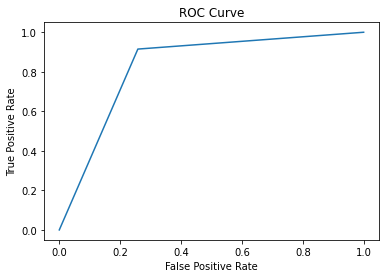

In [81]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

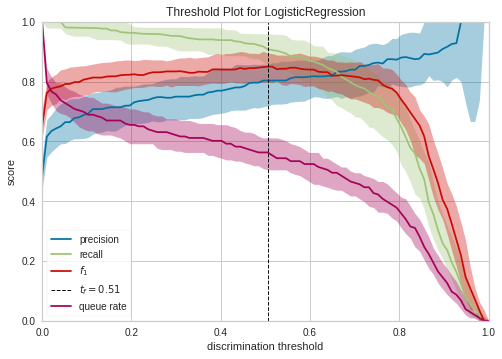

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [114]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(lr1)

visualizer.fit(train_c, y_train)        
visualizer.show()           

### **Decision Tree**

In [101]:
dt1=DecisionTreeClassifier(max_depth=15)
dt1.fit(train_c,y_train)
prediction=dt1.predict(test_c)

In [102]:
#EVALUATION
dt_a1 = accuracy_score(y_test, prediction)*100
dt_p1 = precision_score(y_test, prediction)* 100
dt_r1 = recall_score(y_test, prediction)*100
dt_f11 = f1_score(y_test, prediction)*100
print(dt_a1)
print(dt_p1)

77.51824817518248
70.95115681233933


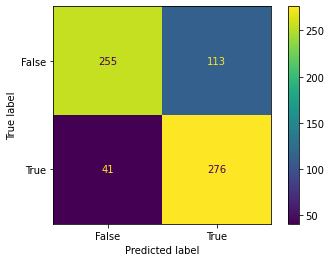

In [103]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7817986215882595


Text(0.5, 1.0, 'ROC Curve')

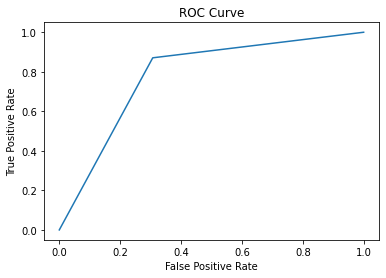

In [104]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

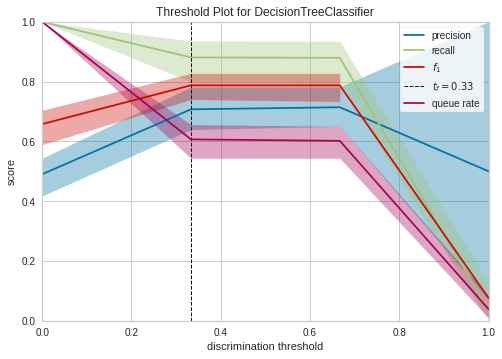

<AxesSubplot:title={'center':'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [105]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(dt1)

visualizer.fit(train_c, y_train)        
visualizer.show()           

### **Random Forest**

In [109]:
rn1=RandomForestClassifier(bootstrap=True,max_depth=15,max_features=5, n_estimators= 100)
rn1.fit(train_c,y_train)
pred_y=rn1.predict(test_c)

In [110]:
#EVALUATION
rn_a1 = accuracy_score(y_test, prediction)*100
rn_p1 = precision_score(y_test, prediction)* 100
rn_r1 = recall_score(y_test, prediction)*100
rn_f11 = f1_score(y_test, prediction)*100
print(rn_a1)
print(rn_p1)

77.51824817518248
70.95115681233933


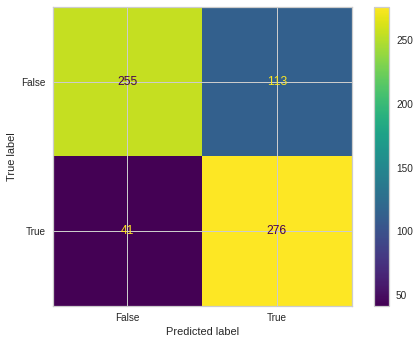

In [111]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7817986215882595


Text(0.5, 1.0, 'ROC Curve')

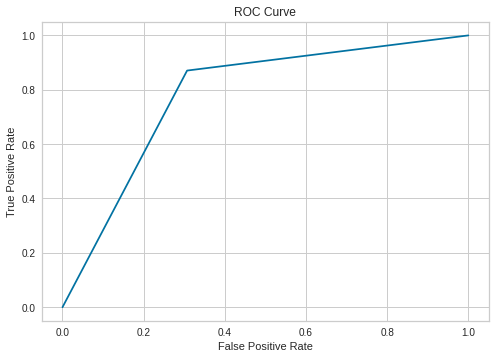

In [112]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

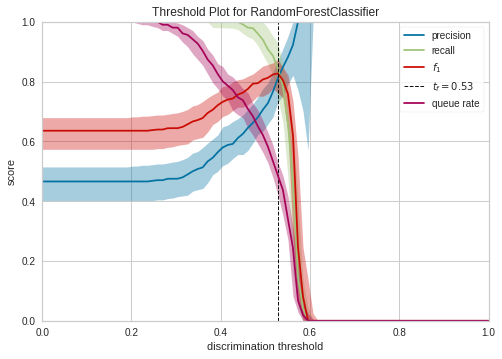

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [113]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(rn1)

visualizer.fit(train_c, y_train)        
visualizer.show()         

In [115]:
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'start': 1649, 'cerav': 274, 'facial': 620, 'lotion': 1015, 'month': 1111, 'ago': 35, 'sinc': 1551, 'constant': 369, 'breakout': 208, 'norm': 1165, 'want': 1902, 'love': 1016, 'persist': 1256, 'recent': 1385, 'decid': 437, 'pick': 1268, 'simpl': 1548, 'best': 155, 'thing': 1770, 'day': 429, 'current': 417, 'spot': 1634, 'begun': 145, 'clear': 319, 'overal': 1210, 'look': 1009, 'face': 619, 'calmer': 246, 'goe': 757, 'fanci': 635, 'long': 1006, 'sciencey': 1489, 'alway': 56, 'come': 339, 'gentl': 734, 'like': 986, 'great': 780, 'price': 1322, 'buy': 240, 'item': 926, 'state': 1651, 'deliv': 459, 'time': 1787, 'good': 762, 'expect': 600, 'condition': 362, 'howev': 861, 'bottl': 198, 'lid': 978, 'terribl': 1758, 'difficult': 487, 'pour': 1310, 'tini': 1790, 'measur': 1066, 'slipperi': 1567, 'hold': 844, 'caus': 268, 'aggrav': 34, 'brilliant': 216, 'valu': 1872, 'money': 1110, 'vaselin': 1877, 'necess': 1144, 'household': 860, 'medicin': 1069, 'cabinet': 243, 'lip': 994, 'e

### Multinomial Naive Bayes model

In [120]:
#IMPLEMENTING AND RUNNING MNB MODEL - TFIDF
mnb2 = MultinomialNB()
mnb2.fit(train_tf, y_train)
prediction = mnb2.predict(test_tf)

In [121]:
#EVALUATION
mnb_a2 = accuracy_score(y_test, prediction)*100
mnb_p2 = precision_score(y_test, prediction)* 100
mnb_r2 = recall_score(y_test, prediction)*100

mnb_f12 = f1_score(y_test, prediction)*100

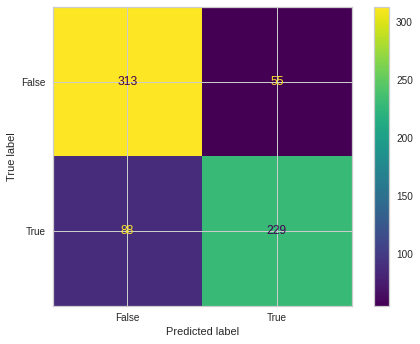

In [122]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=mnb2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb2.classes_) 
display.plot() 

The area under curve 0.7864704773007818


Text(0.5, 1.0, 'ROC Curve')

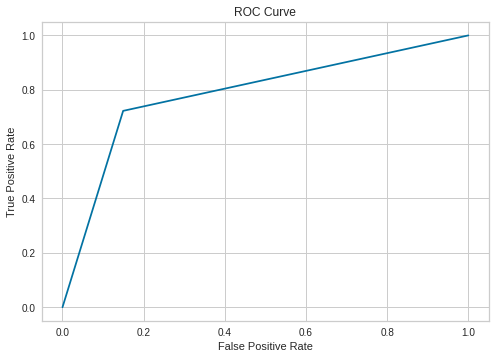

In [123]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

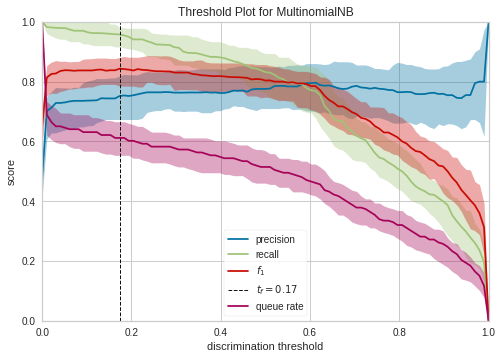

<AxesSubplot:title={'center':'Threshold Plot for MultinomialNB'}, xlabel='discrimination threshold', ylabel='score'>

In [125]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(mnb2)

visualizer.fit(train_c, y_train)        
visualizer.show()         

### Support Vector Machine model

In [126]:
#IMPLEMENTING AND RUNNING SVM MODEL - TFIDF 
svm2 = SVC(kernel='linear')
svm2.fit(train_tf, y_train)
prediction = svm2.predict(test_tf)

In [127]:
#EVALUATION
svm_a2 = accuracy_score(y_test, prediction)*100
svm_p2 = precision_score(y_test, prediction)* 100
svm_r2 = recall_score(y_test, prediction)*100
svm_f12 = f1_score(y_test, prediction)*100

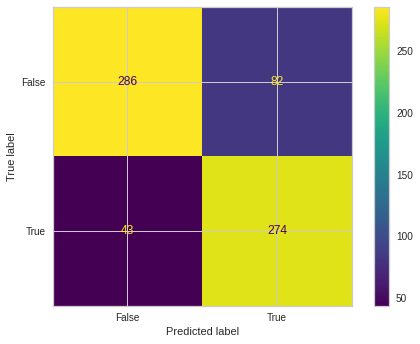

In [128]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=svm2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm2.classes_) 
display.plot() 

The area under curve 0.8207636126731587


Text(0.5, 1.0, 'ROC Curve')

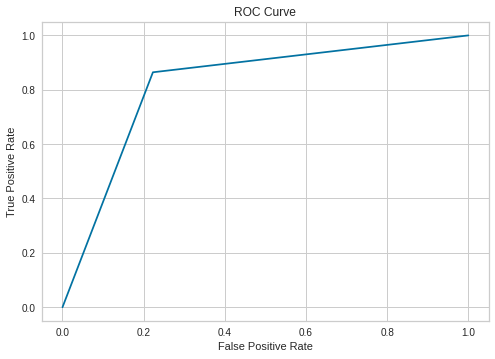

In [129]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

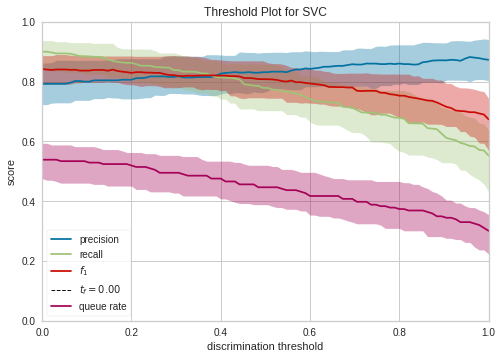

<AxesSubplot:title={'center':'Threshold Plot for SVC'}, xlabel='discrimination threshold', ylabel='score'>

In [132]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(svm2)

visualizer.fit(train_c, y_train)        
visualizer.show() 

### Logistic Regression model

In [28]:
#IMPLEMENTATION AND RUNNING LR MODEL - TFIDF 
lr2 = LogisticRegression()
lr2.fit(train_tf, y_train)
prediction = lr2.predict(test_tf)

In [29]:
#EVALUATION
lr_a2 = accuracy_score(y_test, prediction)*100
lr_p2 = precision_score(y_test, prediction)* 100
lr_r2 = recall_score(y_test, prediction)*100
lr_f12 = f1_score(y_test, prediction)*100

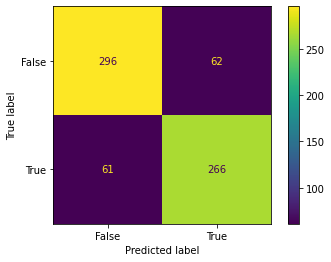

In [30]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=lr2.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr2.classes_) 
display.plot() 

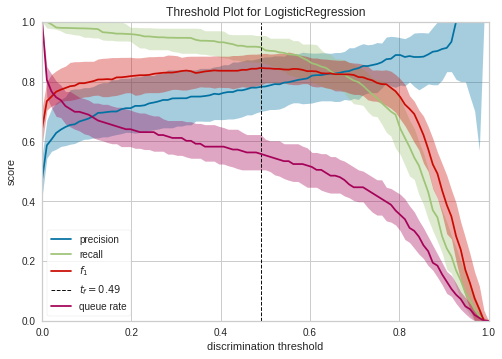

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [133]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(lr2)

visualizer.fit(train_c, y_train)        
visualizer.show() 

### **Decision Tree**

In [134]:
dt2=DecisionTreeClassifier(max_depth=15)
dt2.fit(train_c,y_train)
prediction=dt2.predict(test_c)

In [136]:
#EVALUATION
dt_a2 = accuracy_score(y_test, prediction)*100
dt_p2 = precision_score(y_test, prediction)* 100
dt_r2 = recall_score(y_test, prediction)*100
dt_f12 = f1_score(y_test, prediction)*100

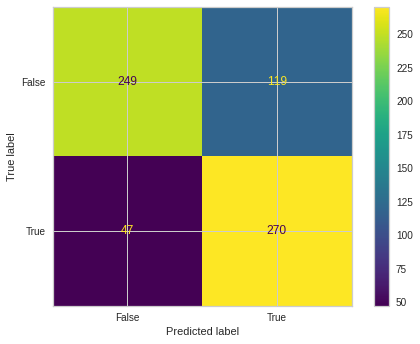

In [137]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7641827252777396


Text(0.5, 1.0, 'ROC Curve')

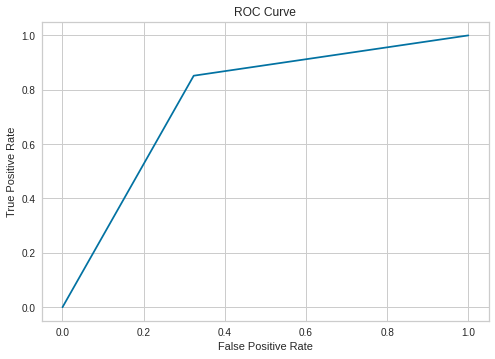

In [138]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

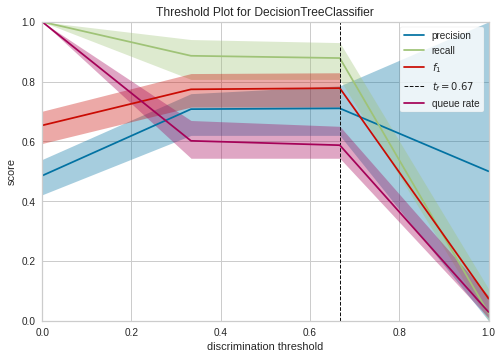

<AxesSubplot:title={'center':'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [139]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(dt2)

visualizer.fit(train_c, y_train)        
visualizer.show()         

### **Random Forest**

In [140]:
rn2=RandomForestClassifier(bootstrap=True,max_depth=15,max_features=5, n_estimators= 100)
rn2.fit(train_c,y_train)
pred_y=rn2.predict(test_c)

In [141]:
#EVALUATION
rn_a2 = accuracy_score(y_test, prediction)*100
rn_p2 = precision_score(y_test, prediction)* 100
rn_r2 = recall_score(y_test, prediction)*100
rn_f12 = f1_score(y_test, prediction)*100

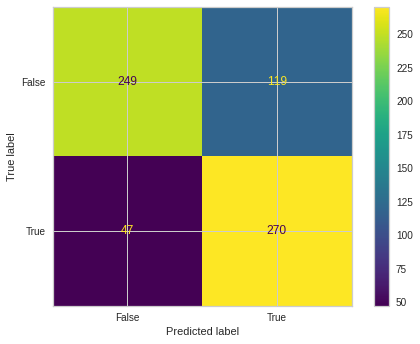

In [142]:
#CONFUSION MATRIX
cm =  confusion_matrix(y_test, prediction, labels=dt1.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr1.classes_) 
display.plot() 

The area under curve 0.7641827252777396


Text(0.5, 1.0, 'ROC Curve')

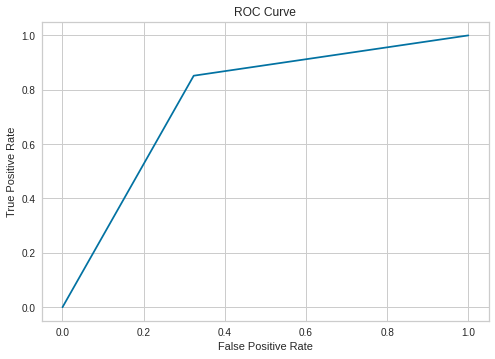

In [143]:
fpr, tpr, thresholds_roc = roc_curve(y_test,prediction)
roc_auc = auc(fpr,tpr)
print("The area under curve {}".format(roc_auc))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

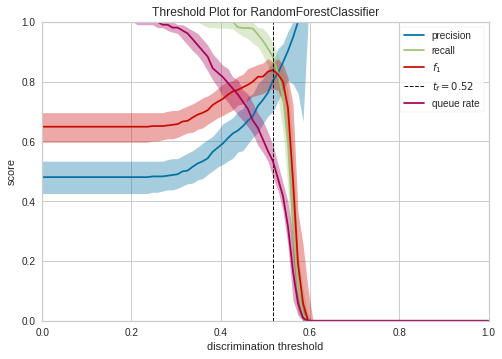

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [144]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer = DiscriminationThreshold(rn1)

visualizer.fit(train_c, y_train)        
visualizer.show()    

### COMPARING ACCURACY

In [145]:
model_accuracy={'MNB': [round(mnb_a1), round(mnb_a2)],
                'SVM': [round(svm_a1), round(svm_a2)],
                'LR': [round(lr_a1), round(lr_a2)],
                'DT': [round(dt_a1), round(dt_a2)],
                'RN': [round(rn_a1), round(rn_a2)]
               }
ma = pd.DataFrame(model_accuracy, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
ma

,MNB,SVM,LR,DT,RN
Count Vectorizer,80,80,82,76,78
Tfidf Vectorizer,79,82,82,76,76


### COMPARING PRECISION

In [146]:
model_precision={'MNB': [round(mnb_p1), round(mnb_p2)],
                'SVM': [round(svm_p1), round(svm_p2)],
                'LR': [round(lr_p1), round(lr_p2)],
                 'DT': [round(dt_p1), round(dt_p2)],
                'RN': [round(rn_p1), round(rn_p2)]
               }
mp = pd.DataFrame(model_precision, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
mp

,MNB,SVM,LR,DT,RN
Count Vectorizer,79,74,75,69,71
Tfidf Vectorizer,81,77,81,69,69


### COMPARING RECALL

In [147]:
model_recall={'MNB': [round(mnb_r1), round(mnb_r2)],
                'SVM': [round(svm_r1), round(svm_r2)],
                'LR': [round(lr_r1), round(lr_r2)],
              'DT': [round(dt_r1), round(dt_r2)],
                'RN': [round(rn_r1), round(rn_r2)]
               }
mr = pd.DataFrame(model_recall, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
mr

,MNB,SVM,LR,DT,RN
Count Vectorizer,77,89,91,85,87
Tfidf Vectorizer,72,86,81,85,85


### COMPARING F1 SCORE

In [148]:
model_f1={'MNB': [round(mnb_f11), round(mnb_f12)],
                'SVM': [round(svm_f11), round(svm_f12)],
                'LR': [round(lr_f11), round(lr_f12)],
                'DT': [round(dt_r1), round(dt_r2)],
                'RN': [round(rn_r1), round(rn_r2)]
               }
mf1 = pd.DataFrame(model_f1, columns = ['MNB','SVM','LR','DT','RN'], index=['Count Vectorizer','Tfidf Vectorizer'])
mf1

,MNB,SVM,LR,DT,RN
Count Vectorizer,78,81,83,85,87
Tfidf Vectorizer,76,81,81,85,85
